# **Capstone # 3**
# By Annette Martin
---
# **Breast Cancer Wisconsin (Diagnostic) Data Set**
## Predict whether the cancer is benign or malignant
### Dr. William H.Wolberg from the General Surgery Dept at the University of Wisconsin

## **Introduction**
*Source:* [[Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)]

###Info about data from source
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

*Ten real-valued features are computed for each cell nucleus:*

1) radius (mean of distances from center to points on the perimeter)

2) texture (standard deviation of gray-scale values)

3) perimeter

4) area

5) smoothness (local variation in radius lengths)

6) compactness (perimeter^2 / area - 1.0)

7) concavity (severity of concave portions of the contour)

8) concave points (number of concave portions of the contour)

9) symmetry

10) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

## **Defining terms**

**Benign:** A mass that is centralized and does not spread to other areas.  They respond well to treatment.  If left untreated it can continue to grow and cause problems to size alone.  Rrefered to as a tumor.

**Malignant:** A mass that will spread to other areas in the body.  Difficult to treat.  Refered to as cancer.

*Source:* [[Johns Hopkins](http://pathology.jhu.edu/pc/BasicTypes1.php#:~:text=for%20a%20neoplasm.-,The%20word%20tumor%20simply%20refers%20to%20a%20mass.,or%20malignant%20(cancerous)%20growths.&text=Benign%20tumors%20are%20non%2Dmalignant,other%20parts%20of%20the%20body)]

## **Using the Data**
Looking at the findings will help doctors to be able to see, through imaging, if the mass is benign or malignant.  Knowing which characteristics of the mass indicate benign or malignant help the doctors better determine which type of mass they are dealing with.  

Knowing the type of mass, either a tumor or cancer, helps to expedite the creation of the patient's treatment plan.  Moving forward in the correct treatment sooner will expedite the process.

With more detail in digging into the findings will help fewer masses being labeled as inconclusive.  Having an exact diagnosis early on is critical to the survival of the patient.

##Hypotheses
##H₀: µ₁ = µ₂ 
There will be statistical **similarities** between the benign and malignant data
##Hₐ: µ₁ ≠ µ₂
There will be statistical **differences** between the benign and malignant data

## Steps

1) Look at data in general, check for null

2) Separate data into bengin and malignant data sets & narrow down to image characteristic means

3) Check that data is evenly distributed

4) Perform t-tests, and confidence intervals on the characteristics

5) Visializations of the data

6) Using the data

7) Conclusion

### Imports

[Link to data set](https://drive.google.com/file/d/1-eqZCZ2V6OqEOzSL254ErqYMNvQwjnP9/view?usp=sharing)

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import pandas as pd
from scipy import stats
import math
import seaborn as sns

### 1) Look at data in general, check for null

In [4]:
data_df = pd.read_csv('/gdrive/My Drive/Data Analyst -Thinkful/Capstone 3/data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**When each image of a mass was looked at there was a slew of numbers for each characteristis.  The mean, standard error, and the worst or largest of these numbers were recorded.  The focus of this presentation will be on the mean of each characteristic for each mass.**

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

no null content

### 2) Separate data into benign and malignant data sets & narrow down to image characteristic means

In [7]:
data_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
benign_mass_df = data_df['diagnosis'] == 'B'
benign_mass_df

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Name: diagnosis, Length: 569, dtype: bool

In [9]:
malignant_mass_df = (data_df['diagnosis'] == 'M')
malignant_mass_df

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

**Below is the data separated into two arrays and narrowed down to the columns in use.**

In [10]:
benign_data = data_df.iloc[benign_mass_df.values,[2,3,4,5,6,7,8,9,10,11]]
benign_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503
...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502


In [11]:
malignant_data = data_df.iloc[malignant_mass_df.values,[2,3,4,5,6,7,8,9,10,11]]
malignant_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


### 3) Check that data is evenly distributed

**Comparison of benign and malignant mass distributions; showing overlapping in the distribution.**

**Malignant(cancerous) is orange.**

**Benign(tumor) is blue.**

In [12]:
sns.set_palette('coolwarm_r', 2)

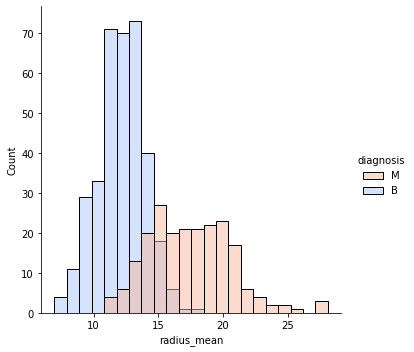

In [13]:
ax = sns.displot(data=data_df, x='radius_mean', hue='diagnosis')

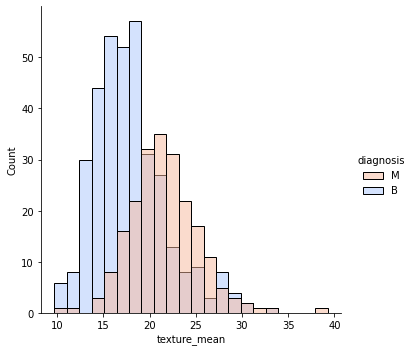

In [14]:
ax = sns.displot(data=data_df, x='texture_mean', hue='diagnosis')

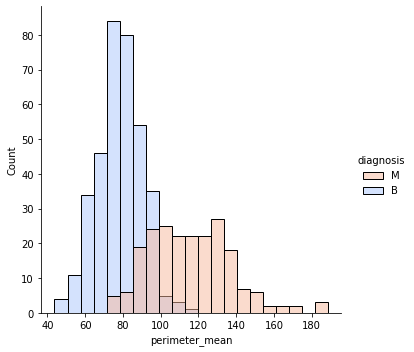

In [15]:
ax = sns.displot(data=data_df, x='perimeter_mean', hue='diagnosis')

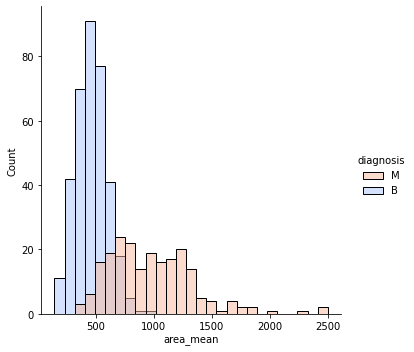

In [16]:
ax = sns.displot(data=data_df, x='area_mean', hue='diagnosis')

**The overlap of the benign and malignant data is small in some, but greater in others.  The overlap is where many false negatives and false positives will arise if only looking at one characteristic in deciding the diagnosis of the mass to be either benign or malignant.**

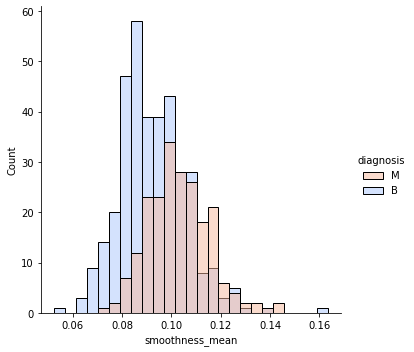

In [17]:
ax = sns.displot(data=data_df, x='smoothness_mean', hue='diagnosis')

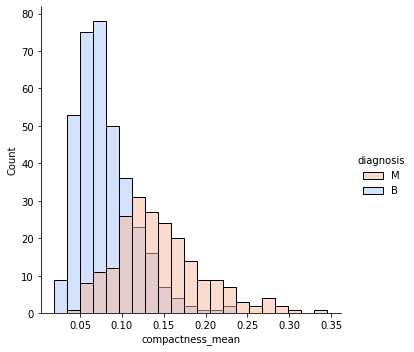

In [18]:
ax = sns.displot(data=data_df, x='compactness_mean', hue='diagnosis')

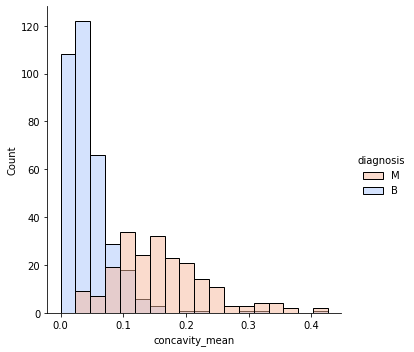

In [19]:
ax = sns.displot(data=data_df, x='concavity_mean', hue='diagnosis')

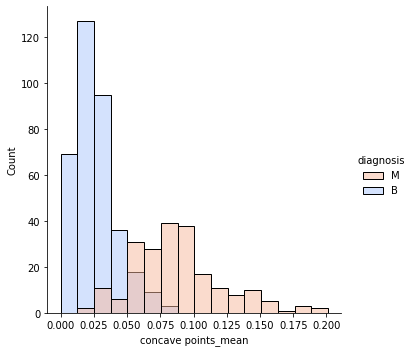

In [20]:
ax = sns.displot(data=data_df, x='concave points_mean', hue='diagnosis')

**Here, the benign and malignant data overlap quite a bit.**

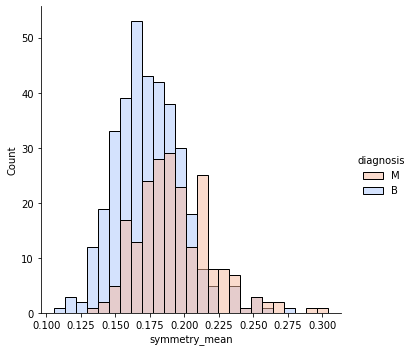

In [21]:
ax = sns.displot(data=data_df, x='symmetry_mean', hue='diagnosis')

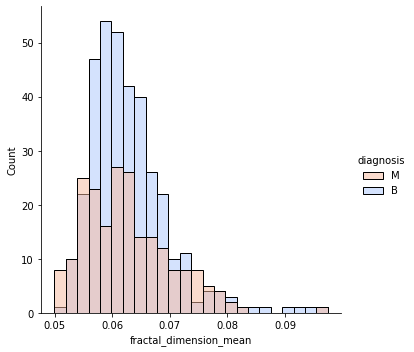

In [22]:
ax = sns.displot(data=data_df, x='fractal_dimension_mean', hue='diagnosis')

### 4) Look at statistics, perform t-tests, and confidence intervals on the characteristics

**Let's look at the descriptive statistics of the data**

In [23]:
benign_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750


In [24]:
malignant_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440


**At a quick glance, notice that the means between the benign and malignant data sets for each characteristic looks relatively different.**

**Also notice that there looks to be an overlap between min and max numbers between the data set masses for their characteristics.**

**Take a look at the T-test results in comparing the benign and malignant data sets**

In [25]:
characteristics = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
for characteristic in characteristics:
    def t_test(characteristic):
        test = stats.ttest_ind(benign_data[characteristic], malignant_data[characteristic])
        return test
    results = t_test(characteristic)
    print('{}:         {}'.format(characteristic, results))

radius_mean:         Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262422e-96)
texture_mean:         Ttest_indResult(statistic=-10.86720108146434, pvalue=4.0586360478980736e-25)
perimeter_mean:         Ttest_indResult(statistic=-26.405212979192665, pvalue=8.43625103617473e-101)
area_mean:         Ttest_indResult(statistic=-23.938687235690992, pvalue=4.734564310307344e-88)
smoothness_mean:         Ttest_indResult(statistic=-9.146098808149038, pvalue=1.0518503592032013e-18)
compactness_mean:         Ttest_indResult(statistic=-17.69839197688993, pvalue=3.9382631058873895e-56)
concavity_mean:         Ttest_indResult(statistic=-23.103963430622642, pvalue=9.966555755072963e-84)
concave points_mean:         Ttest_indResult(statistic=-29.354318592113618, pvalue=7.101150161057422e-116)
symmetry_mean:         Ttest_indResult(statistic=-8.338311789592808, pvalue=5.733384028466827e-16)
fractal_dimension_mean:         Ttest_indResult(statistic=0.30571112978583087, pvalue=0.759936

**All characteristics are significantly different, with a p-value that is very close to 0 between benign and malignant data except for fractal dimention mean.**

**Take a look at the difference in means at the 95% cnfidence interval.**

In [26]:
characteristics = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
for characteristic in characteristics:
    def get_95_ci(array_1, array_2):
        sample_1_n = array_1.shape[0]
        sample_2_n = array_2.shape[0]
        sample_1_mean = array_1.mean()
        sample_2_mean = array_2.mean()
        sample_1_var = array_1.var()
        sample_2_var = array_2.var()
        mean_difference = sample_2_mean - sample_1_mean
        std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
        margin_of_error = 1.96 * std_err_difference
        ci_lower = mean_difference - margin_of_error
        ci_upper = mean_difference + margin_of_error
        return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    results = get_95_ci(benign_data[characteristic],malignant_data[characteristic])
    print('{}:        {}'.format(characteristic, results))

radius_mean:        The difference in means at the 95% confidence interval (two-tail) is between 4.847124723467965 and 5.7854880348429125.
texture_mean:        The difference in means at the 95% confidence interval (two-tail) is between 3.0339447927021377 and 4.34634271852878.
perimeter_mean:        The difference in means at the 95% confidence interval (two-tail) is between 34.10325466400698 and 40.47668772804431.
area_mean:        The difference in means at the 95% confidence interval (two-tail) is between 464.1351984332775 and 567.0372395985389.
smoothness_mean:        The difference in means at the 95% confidence interval (two-tail) is between 0.008223997949178195 and 0.012617689065250178.
compactness_mean:        The difference in means at the 95% confidence interval (two-tail) is between 0.05703638834646769 and 0.07316993399378902.
concavity_mean:        The difference in means at the 95% confidence interval (two-tail) is between 0.10365862591783591 and 0.12577556602762158.
conca

### 5) Visualizations of data

**In these visualizations we can see that, yes, the bulk of the data from each type of mass will generally be different from the other for the characteristics, but they do over lap.**

**When the boxes in the boxplots overlap we can see that the data can be similar.  Caution needs to be taken when identifying a mass either malignant or benign.**

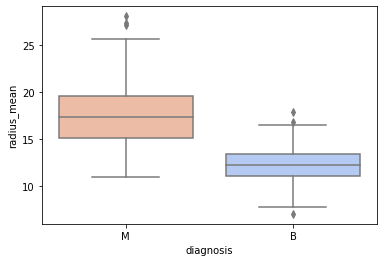

In [27]:
ax = sns.boxplot(y='radius_mean', x='diagnosis', data=data_df)

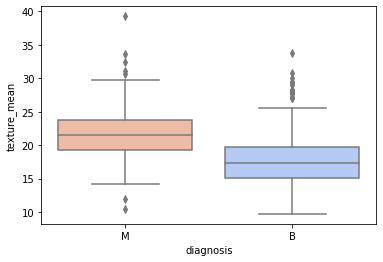

In [28]:
ax = sns.boxplot(y='texture_mean', x='diagnosis', data=data_df)

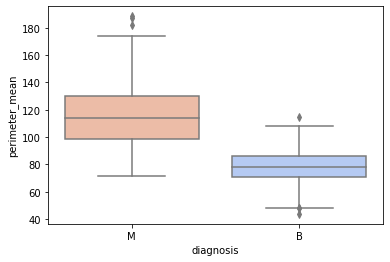

In [29]:
ax = sns.boxplot(y='perimeter_mean', x='diagnosis', data=data_df)

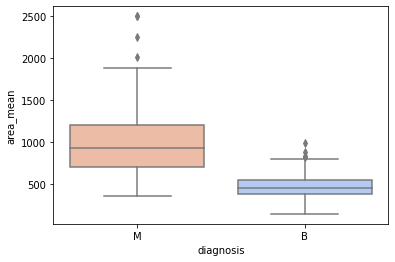

In [30]:
ax = sns.boxplot(y='area_mean', x='diagnosis', data=data_df)

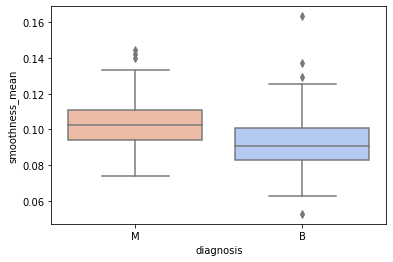

In [31]:
ax = sns.boxplot(y='smoothness_mean', x='diagnosis', data=data_df)

**With some there is little overlapping between the benign and the malignant data.  But with others the data is greatly overlapped.**

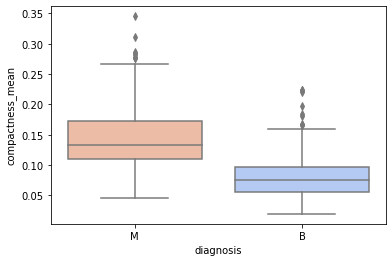

In [32]:
ax = sns.boxplot(y='compactness_mean', x='diagnosis', data=data_df)

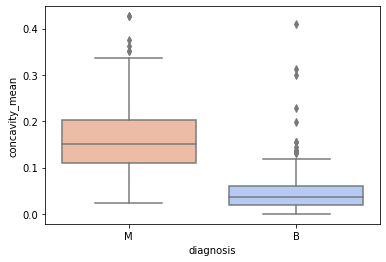

In [33]:
ax = sns.boxplot(y='concavity_mean', x='diagnosis', data=data_df)

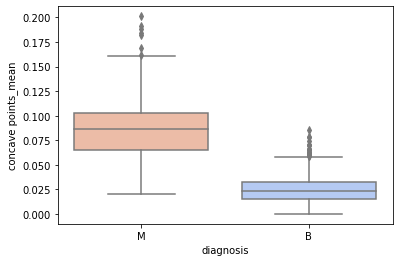

In [34]:
ax = sns.boxplot(y='concave points_mean', x='diagnosis', data=data_df)

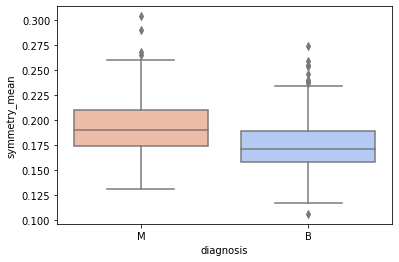

In [35]:
ax = sns.boxplot(y='symmetry_mean', x='diagnosis', data=data_df)

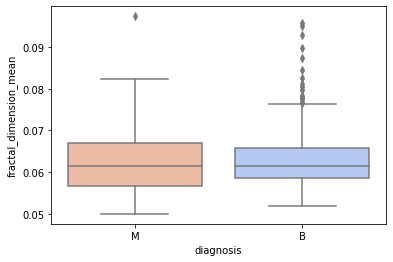

In [36]:
ax = sns.boxplot(y='fractal_dimension_mean', x='diagnosis', data=data_df)

###6) Using the Data

**A grading score sheet for the characteristics uses the first nine characteristics to determine if the mass is benign or malignant.**

1. Comparing the characteristic mean to see if >25% of the malignant data for the characteristic.
2. Total the number of characteristics that are >25% for a mass.
3. If 4/9 are >25% of the malignant data for the chacteristic, then most likely the mass is malignant; otherwise the mass is most likely benign

**The grade scoring of the mass will accurately diagnose 92% of the time.**

**A false diagnosis will result in a false negatives 40% of the time and a false positive 60% of the time**

### 7) Conclusion

**In conclusion we can see that there are generalities that can be made.  But that each characteristic by its self is not conclusive in identifying the mass's status as benign or malignant.**

**There are many options and opportunities to use this information to help identify cancer and create accurate treatment plans to expedite the healing to help save lives.  As a side benefit, this will also reduce costs in hospitals and insurance plans and premiums.**